In [ ]:
# PROBLEM STATEMENT 15
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the hospital data
hospital_data = pd.read_csv('/content/all_hospitals (1) (1).csv')

population_data = pd.read_csv('/content/census.csv')

# Merge the two datasets on the 'State/UT' column
combined_data = pd.merge(hospital_data, population_data, on='State/Ut')

# Calculate hospital beds per 10,000 people
combined_data['Beds_per_10k'] = (combined_data['Hospitalbeds'] / combined_data['Population']) * 10000

# Calculate the national average
national_avg = combined_data['Hospitalbeds'].sum() / combined_data['Population'].sum() * 10000

# Identify the three States/UTs with the least hospital beds per 10,000 people
combined_data['Beds_per_10k'] = pd.to_numeric(combined_data['Beds_per_10k'], errors='coerce')
lowest_states = combined_data.nsmallest(3, 'Beds_per_10k')

print("Three States/UTs with the least hospital beds per 10,000 people:")
print(lowest_states[['State/Ut', 'Beds_per_10k']])

Three States/UTs with the least hospital beds per 10,000 people:
                   State/Ut  Beds_per_10k
128           DAMAN AND DIU     15.587975
126  DADRA AND NAGAR HAVELI     16.525607
213               JHARKHAND     25.406168


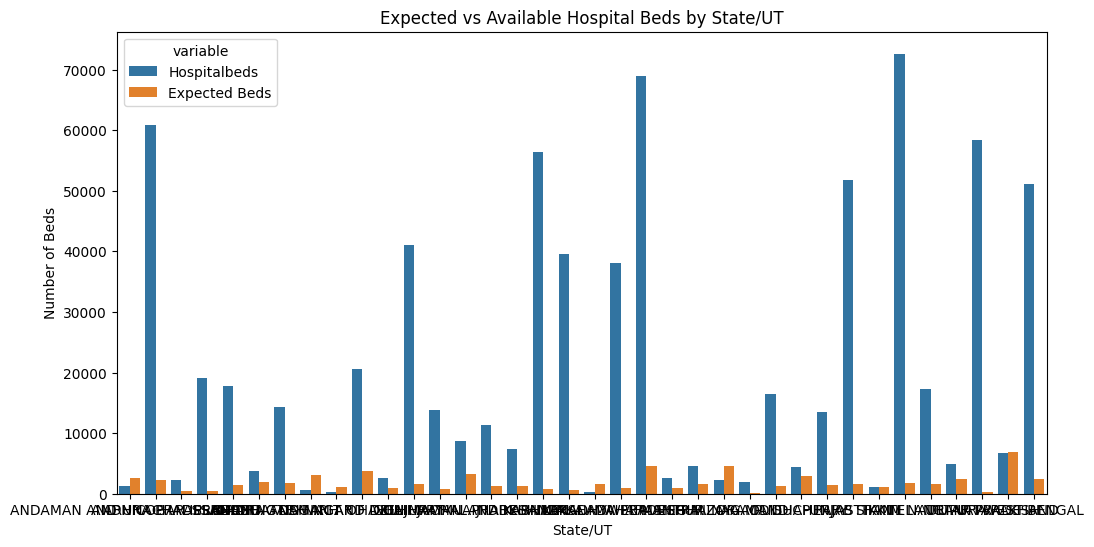

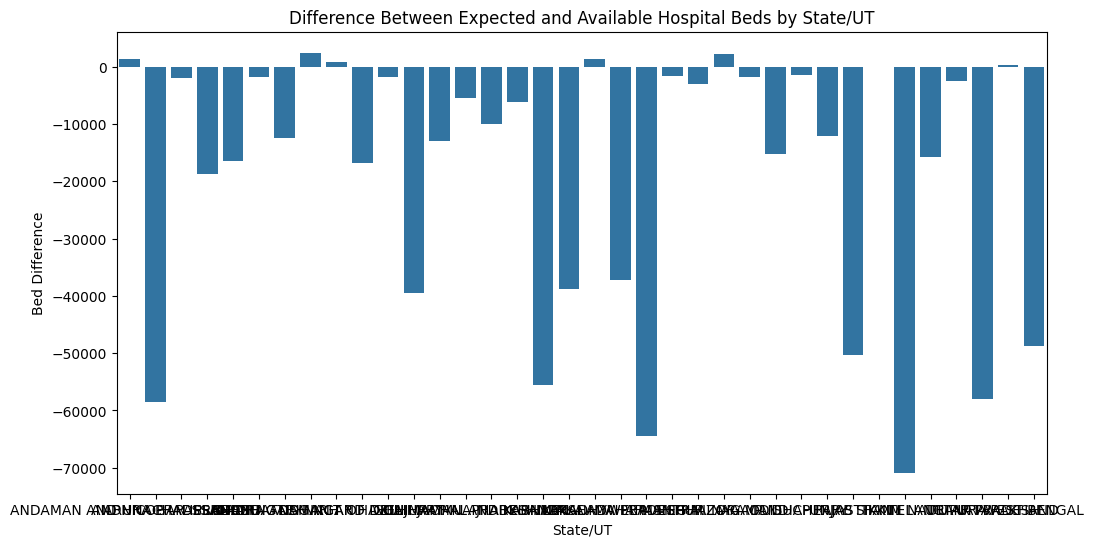

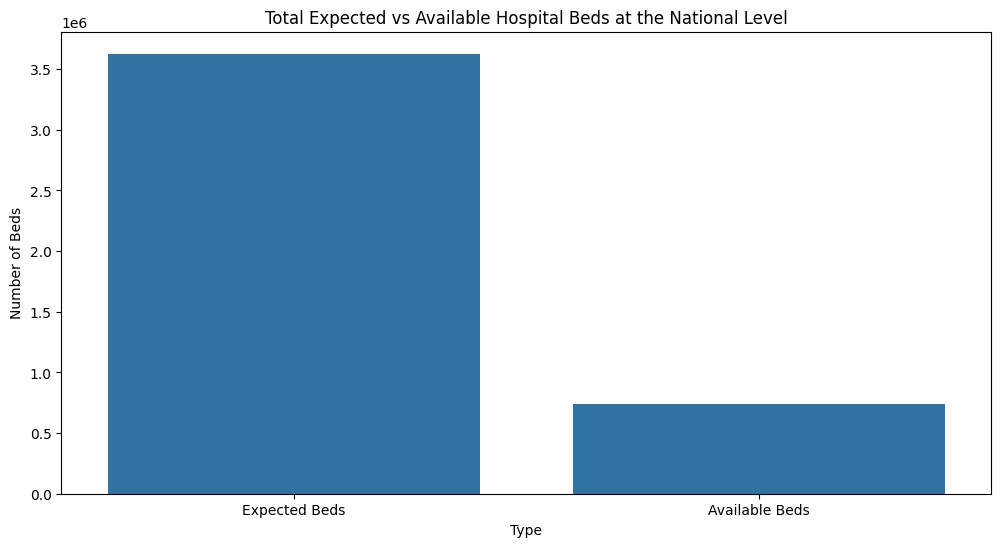

In [ ]:
# PROBLEM STATEMENT 16 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the hospital data
hospital_data = pd.read_csv('/content/all_hospitals (1).csv')
df = pd.DataFrame(hospital_data)

# WHO standard for beds per 1000 people
WHO_STANDARD = 3

# Calculate the expected number of beds for each State/Ut based on the WHO standard
df['Expected Beds'] = (df['Population'] / 1000) * WHO_STANDARD

# Calculate the difference between expected and available beds
df['Bed Difference'] = df['Expected Beds'] - df['Hospitalbeds']

# Bar chart for expected vs available beds in each State/Ut
plt.figure(figsize=(12, 6))
sns.barplot(data=df.melt(id_vars='State/Ut', value_vars=['Hospitalbeds', 'Expected Beds']),
            x='State/Ut', y='value', hue='variable')
plt.title("Expected vs Available Hospital Beds by State/UT")
plt.xlabel("State/UT")
plt.ylabel("Number of Beds")
plt.show()

# Bar chart for the bed difference (expected - available) in each State/UT
plt.figure(figsize=(12, 6))
sns.barplot(x='State/Ut', y='Bed Difference', data=df)
plt.title("Difference Between Expected and Available Hospital Beds by State/UT")
plt.xlabel("State/UT")
plt.ylabel("Bed Difference")
plt.show()

# Total expected and available beds at the national level
total_expected_beds = df['Expected Beds'].sum()
total_available_beds = df['Hospitalbeds'].sum()

# Data for national level
national_df = pd.DataFrame({
    'Type': ['Expected Beds', 'Available Beds'],
    'Count': [total_expected_beds, total_available_beds]
})

# Bar chart for national level expected vs available beds
plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Count', data=national_df)
plt.title("Total Expected vs Available Hospital Beds at the National Level")
plt.xlabel("Type")
plt.ylabel("Number of Beds")
plt.show()


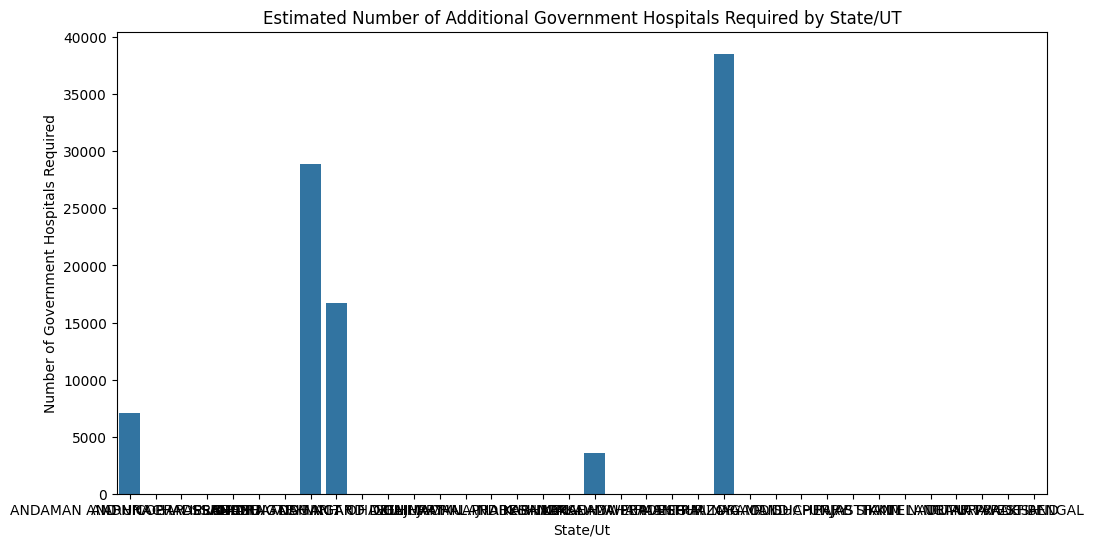

Total number of additional government hospitals required at the national level:
94862


In [ ]:
# PROBLEM STATEMENT 17 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

# Load the hospital data (from the cleaned data)
hospital_data = pd.read_csv('/content/all_hospitals (1).csv')
df = pd.DataFrame(hospital_data)

# WHO standard for beds per 1000 people
WHO_STANDARD = 3

# Calculate the expected number of beds for each State/UT based on the WHO standard
df['Expected Beds'] = (df['Population'] / 1000) * WHO_STANDARD

# Calculate the bed deficit (the gap between expected and available beds)
df['Bed Deficit'] = df['Expected Beds'] - df['Hospitalbeds']

# Calculate the average number of beds per government hospital for each state/UT
df['Avg Beds per Govt Hospital'] = df['Hospitalbeds'] / df['Beds']

# Calculate the number of government hospitals required to fill the gap in each state/UT
df['Govt Hospitals Required'] = df['Bed Deficit'] / df['Avg Beds per Govt Hospital']
df['Govt Hospitals Required'] = df['Govt Hospitals Required'].apply(lambda x: math.ceil(x) if x > 0 else 0)

# Visual representation of the number of government hospitals required in each state/UT
plt.figure(figsize=(12, 6))
sns.barplot(x='State/Ut', y='Govt Hospitals Required', data=df)
plt.title("Estimated Number of Additional Government Hospitals Required by State/UT")
plt.xlabel("State/Ut")
plt.ylabel("Number of Government Hospitals Required")
plt.show()

# Calculate the total number of government hospitals required at the national level
total_govt_hospitals_required = df['Govt Hospitals Required'].sum()

print("Total number of additional government hospitals required at the national level:")
print(total_govt_hospitals_required)

Average Livability Score (Urban): 68.9085036119711
Average Livability Score (Rural): 96.68115784008309
Average Amenities Score (Urban): 85.74839009287926
Average Amenities Score (Rural): 87.2435254413292
Correlation Matrix:
                  livability_score  amenities_score
livability_score          1.000000         0.289654
amenities_score           0.289654         1.000000


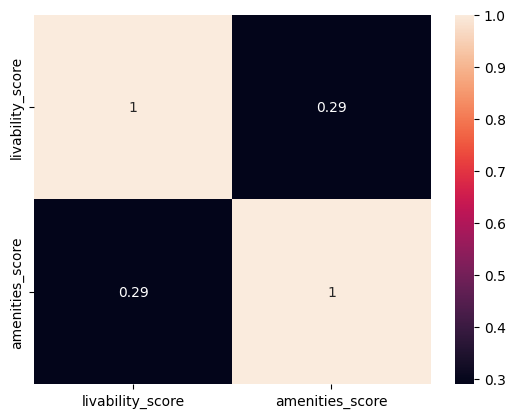

In [ ]:
# PROBLEM STATEMENT 18 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

housing_data = pd.read_csv("/content/housing.csv")
census_data = pd.read_csv("/content/census (1).csv")

# Merge housing and census data (assuming a common identifier like 'location_id')
merged_data = pd.merge(housing_data, census_data, on="Area Name")

# Define functions to assess housing quality
def livability_score(data):
    # Calculate a score based on specific amenities (e.g., plumbing, electricity)
    livability_factors = ["Total Number of Livable", "Total Number of Residence Livable", "Total Number of Residence cum other"]  # Replace with your columns
    score = data[livability_factors].sum(axis=1)
    return score

def amenities_score(data):
    # Calculate a score based on additional amenities (e.g., pool, gym)
    amenity_factors = ["Married_C_1", "Married_C_2", "Married_C_3"]
    score = data[amenity_factors].sum(axis=1)
    return score

# Add scores to merged data
merged_data["livability_score"] = livability_score(merged_data)
merged_data["amenities_score"] = amenities_score(merged_data)

# Analyze housing quality by location type (urban/rural)
urban_data = merged_data[merged_data["Rural/Urban"] == "Urban"]
rural_data = merged_data[merged_data["Rural/Urban"] == "Rural"]

# Compare average scores (livability, amenities) between urban and rural areas
print("Average Livability Score (Urban):", urban_data["livability_score"].mean())
print("Average Livability Score (Rural):", rural_data["livability_score"].mean())
print("Average Amenities Score (Urban):", urban_data["amenities_score"].mean())
print("Average Amenities Score (Rural):", rural_data["amenities_score"].mean())

# Correlation analysis with demographic factors
correlation = merged_data[["livability_score", "amenities_score"]].corr()
print("Correlation Matrix:")
print(correlation)

# Heatmap to visualize correlations
sns.heatmap(correlation, annot=True)
plt.show()